##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal

In [2]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data\Output-Python

09/07/2021  09:45 AM    <DIR>          .
09/07/2021  09:45 AM    <DIR>          ..
09/07/2021  09:45 AM    <DIR>          .ipynb_checkpoints
08/31/2021  10:49 AM    <DIR>          0307-testinputfile4-0004
08/31/2021  10:48 AM    <DIR>          0308-testinputfile4-0004
08/31/2021  10:48 AM    <DIR>          0309-VariedNuni_8_2_2021-0000
08/31/2021  10:49 AM    <DIR>          0310-VariedNuni_8_2_2021-0000
08/31/2021  10:48 AM    <DIR>          0311-VariedNuni_8_2_2021-0001
08/31/2021  10:49 AM    <DIR>          0312-VariedNuni_8_2_2021-0001
08/31/2021  10:48 AM    <DIR>          0313-VariedNuni_8_2_2021-0002
08/31/2021  10:49 AM    <DIR>          0314-VariedNuni_8_2_2021-0002
08/31/2021  10:48 AM    <DIR>          0315-er_equal_1-0002
08/31/2021  10:49 AM    <DIR>          0316-er_equal_1-0002
08/31/2021  10

In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [5]:
import glob

In [6]:
folders = glob.glob("*NewTirmzi_large_range*/")
folders


['0396-NewTirmzi_large_range-0001\\',
 '0398-NewTirmzi_large_range-0000\\',
 '0400-NewTirmzi_large_range-0002\\']

In [7]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'C-Z.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9, fortran=False)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [8]:
all_data

{'0396-NewTirmzi_large_range-0001\\': {'z': array([150., 152., 154., 156., 158., 160., 162., 164., 166., 168., 170.,
         172., 174., 176., 178., 180., 182., 184., 186., 188., 190., 192.,
         194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
         216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236.,
         238., 240., 242., 244., 246., 248., 250., 252., 254., 256., 258.,
         260., 262., 264., 266., 268., 270., 272., 274., 276., 278., 280.,
         282., 284., 286., 288., 290., 292., 294., 296., 298., 300., 302.,
         304., 306., 308., 310., 312., 314., 316., 318., 320., 322., 324.,
         326., 328., 330., 332., 334., 336., 338., 340., 342., 344., 346.,
         348., 350., 352., 354., 356., 358., 360., 362., 364., 366., 368.,
         370., 372., 374., 376., 378., 380., 382., 384., 386., 388., 390.,
         392., 394., 396., 398., 400., 402., 404., 406., 408., 410., 412.,
         414., 416., 418., 420., 422., 424., 426., 428., 4

In [9]:
all_data.keys()

dict_keys(['0396-NewTirmzi_large_range-0001\\', '0398-NewTirmzi_large_range-0000\\', '0400-NewTirmzi_large_range-0002\\'])

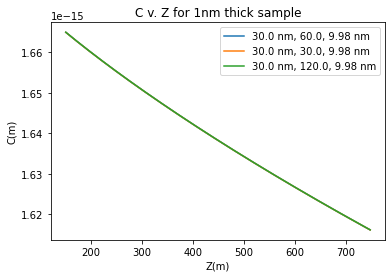

In [20]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 9.98}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")

cut off last experiment because capacitance was off the scale

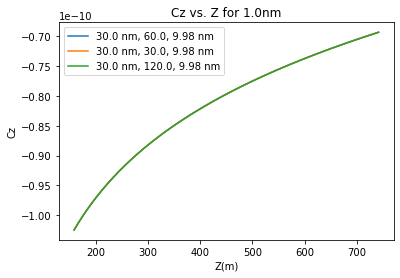

In [21]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 9.98}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

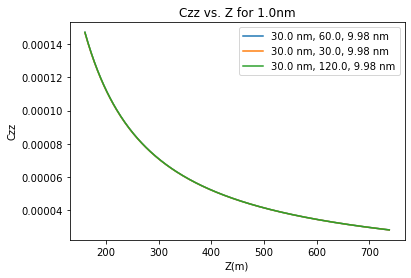

In [22]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 9.98}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [13]:
params

{'n': 750,
 'm+': 750,
 'm-': 88,
 'h0': 0.5,
 'rho_max': 1000000.0,
 'z_max': 1000000.0,
 'min': 150.0,
 'max': 750.0,
 'istep': 4.0,
 'Rtip': 30.0,
 'half-angle': 20.0,
 'HCone': 11999.99,
 'RCantilever': 13750.0,
 'thickness_Cantilever': 1000.01,
 'eps_r': 120.0,
 'Thickness_sample': 9.98,
 'Solving Method': 'LAPACK',
 'Test': 0,
 'Verbosity': 0,
 'Nuni': 1,
 'Equally spaced': True}

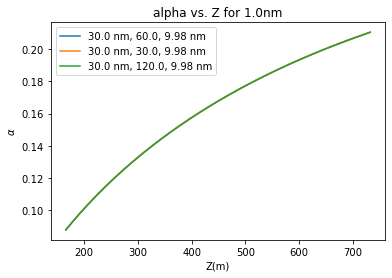

In [23]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 9.98}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [15]:
data

array([[1.50000000e+02, 1.66499936e-15],
       [1.52000000e+02, 1.66479226e-15],
       [1.54000000e+02, 1.66458579e-15],
       [1.56000000e+02, 1.66437994e-15],
       [1.58000000e+02, 1.66417469e-15],
       [1.60000000e+02, 1.66397005e-15],
       [1.62000000e+02, 1.66376598e-15],
       [1.64000000e+02, 1.66356250e-15],
       [1.66000000e+02, 1.66335959e-15],
       [1.68000000e+02, 1.66315724e-15],
       [1.70000000e+02, 1.66295545e-15],
       [1.72000000e+02, 1.66275420e-15],
       [1.74000000e+02, 1.66255349e-15],
       [1.76000000e+02, 1.66235331e-15],
       [1.78000000e+02, 1.66215365e-15],
       [1.80000000e+02, 1.66195451e-15],
       [1.82000000e+02, 1.66175588e-15],
       [1.84000000e+02, 1.66155775e-15],
       [1.86000000e+02, 1.66136012e-15],
       [1.88000000e+02, 1.66116298e-15],
       [1.90000000e+02, 1.66096632e-15],
       [1.92000000e+02, 1.66077014e-15],
       [1.94000000e+02, 1.66057443e-15],
       [1.96000000e+02, 1.66037919e-15],
       [1.980000

In [16]:
from scipy.optimize import curve_fit


In [17]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [18]:
all_data.keys()

dict_keys(['0396-NewTirmzi_large_range-0001\\', '0398-NewTirmzi_large_range-0000\\', '0400-NewTirmzi_large_range-0002\\'])

In [19]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

KeyError: 'capsol-calc\\0001-capsol\\'

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)